In [2]:
library(rms)
library(pROC)
library(rmda)

In [3]:
train <-read.csv("F:/Experiments/YulanPeng/Wenwen/2023Run/DM/Experiments/Clinical/nom-train.csv")
val <-read.csv("F:/Experiments/YulanPeng/Wenwen/2023Run/DM/Experiments/Clinical/nom-validation.csv")
test <-read.csv("F:/Experiments/YulanPeng/Wenwen/2023Run/DM/Experiments/Clinical/nom-test.csv")

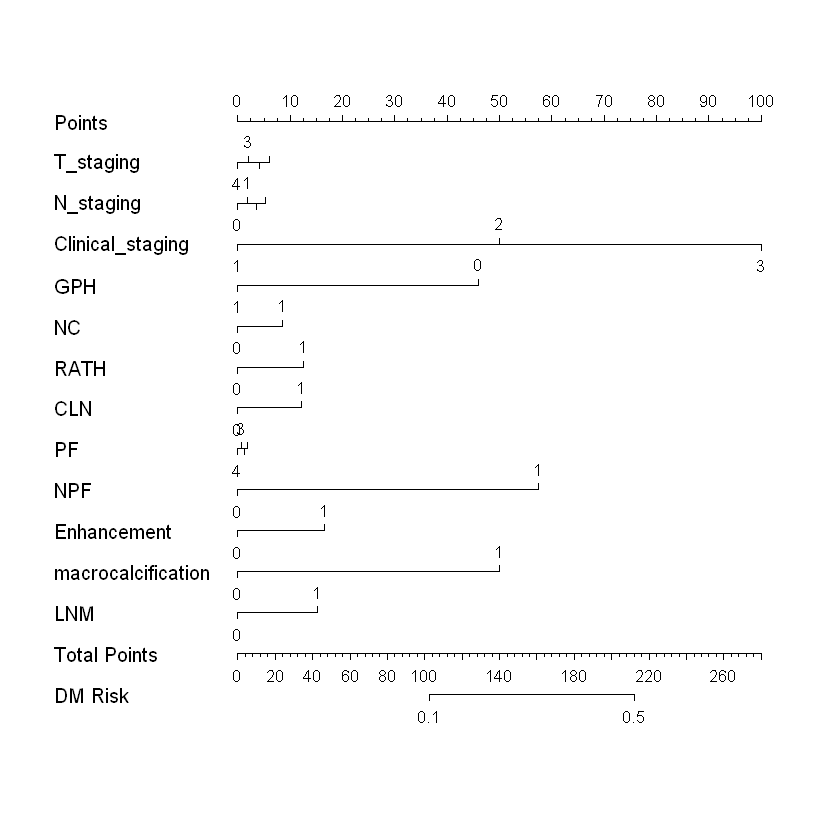

In [5]:
dd=datadist(train)
options(datadist="dd")
f1 <- lrm(DM~ T_staging
          + N_staging
          + Clinical_staging
          + GPH
          + NC
          + RATH
          + CLN
          + PF
          + NPF
          + Enhancement
          + macrocalcification
          + LNM
          ,data = train,x = TRUE,y = TRUE)

nom <- nomogram(f1, fun=plogis,fun.at=c(.001, .01, seq(.1,.9, by=.4)), lp=F, funlabel="DM Risk")
#par(pin = c(20,10))
plot(nom)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



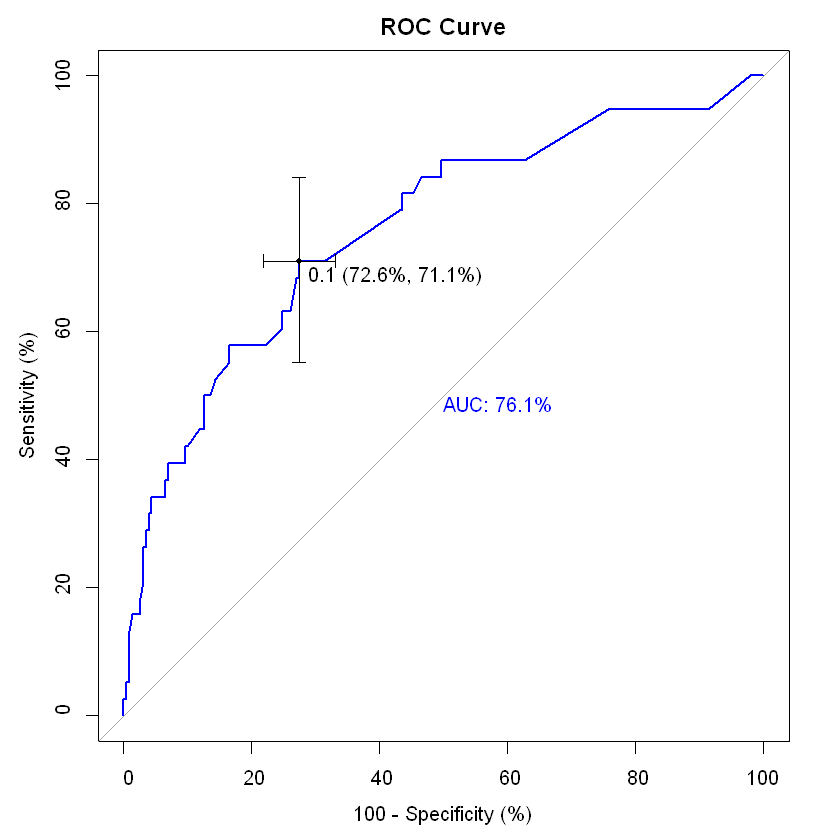

In [6]:
# ROC train
f2 <- glm(DM~ T_staging
          + N_staging
          + Clinical_staging
          + GPH
          + NC
          + RATH
          + CLN
          + PF
          + NPF
          + Enhancement
          + macrocalcification
          + LNM
          ,data = train,family = "binomial")

pre <- predict(f2, type='response')
plot.roc(train$DM, pre,
         main="ROC Curve", percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, ci.type="bars", 
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue"
         #,identity=TRUE
         ,legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )

Setting levels: control = 0, case = 1

Setting direction: controls < cases



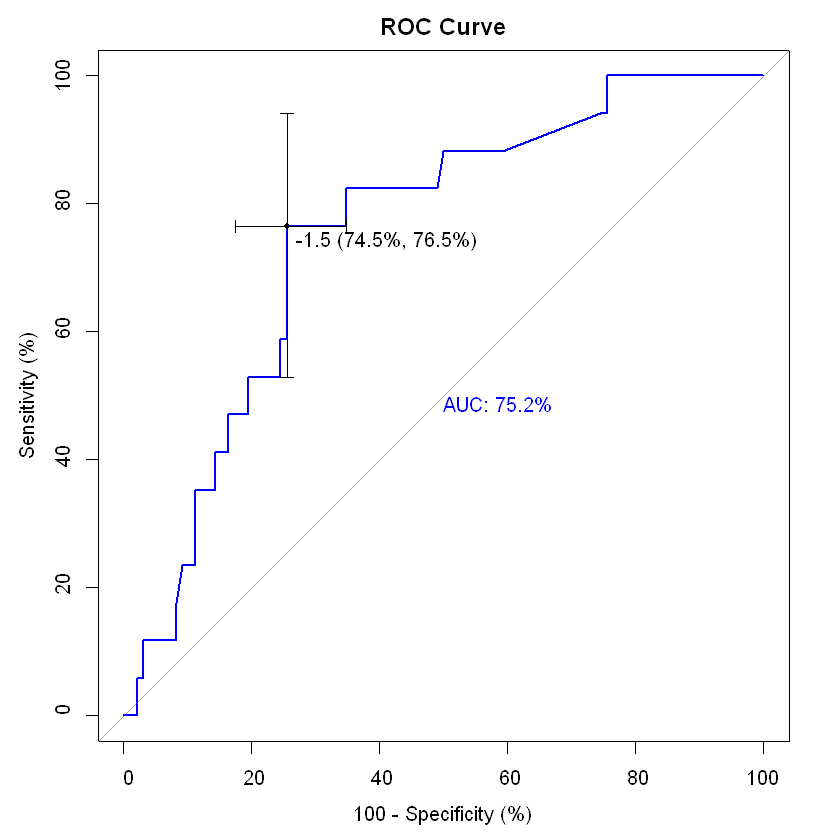

In [7]:
# ROC val
pre1 <- predict(f2,newdata = val)
plot.roc(val$DM, pre1,
         main="ROC Curve", percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, ci.type="bars",
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue",legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )

Setting levels: control = 0, case = 1

Setting direction: controls < cases



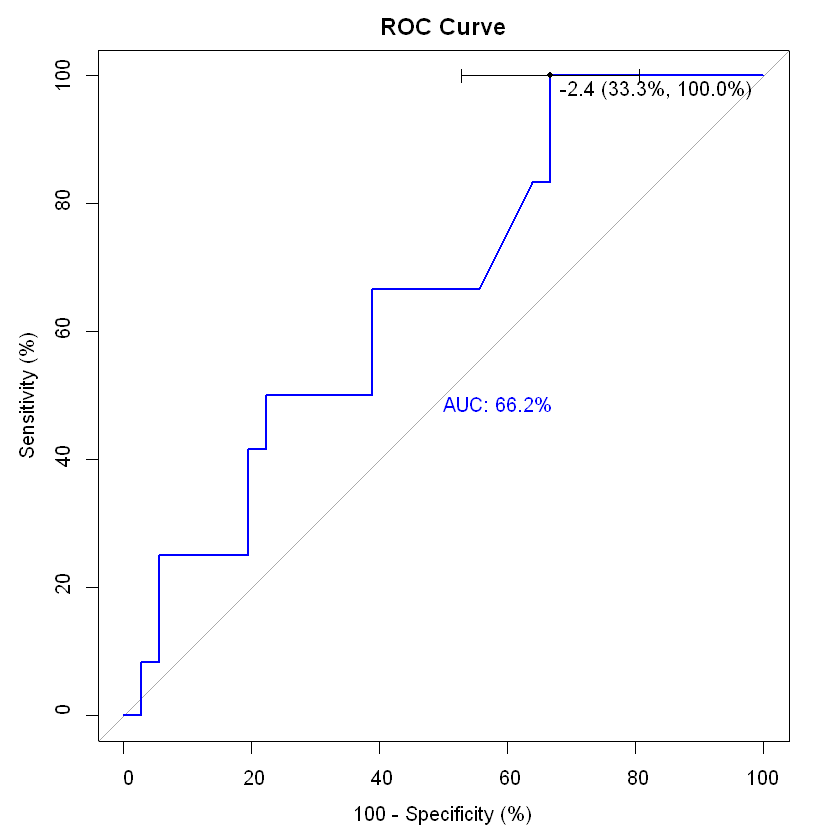

In [8]:
# ROC test
pre2 <- predict(f2,newdata = test)
plot.roc(test$DM, pre2,
         main="ROC Curve", percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, ci.type="bars",
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue",legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )

In [9]:
f2


Call:  glm(formula = DM ~ T_staging + N_staging + Clinical_staging + 
    GPH + NC + RATH + CLN + PF + NPF + Enhancement + macrocalcification + 
    LNM, family = "binomial", data = train)

Coefficients:
       (Intercept)           T_staging           N_staging    Clinical_staging  
          -4.12394            -0.04084             0.03589             1.00236  
               GPH                  NC                RATH                 CLN  
          -0.92184             0.17077             0.24963             0.24272  
                PF                 NPF         Enhancement  macrocalcification  
          -0.01256             1.15074             0.33228             1.00023  
               LNM  
           0.30334  

Degrees of Freedom: 267 Total (i.e. Null);  255 Residual
Null Deviance:	    218.8 
Residual Deviance: 186.6 	AIC: 212.6

In [10]:
f1

Logistic Regression Model
 
 lrm(formula = DM ~ T_staging + N_staging + Clinical_staging + 
     GPH + NC + RATH + CLN + PF + NPF + Enhancement + macrocalcification + 
     LNM, data = train, x = TRUE, y = TRUE)
 
                       Model Likelihood    Discrimination    Rank Discrim.    
                             Ratio Test           Indexes          Indexes    
 Obs           268    LR chi2     32.15    R2       0.203    C       0.761    
  0            230    d.f.           12    g        1.138    Dxy     0.522    
  1             38    Pr(> chi2) 0.0013    gr       3.121    gamma   0.537    
 max |deriv| 9e-11                         gp       0.129    tau-a   0.128    
                                           Brier    0.103                     
 
                    Coef    S.E.   Wald Z Pr(>|Z|)
 Intercept          -4.1239 5.3069 -0.78  0.4371  
 T_staging          -0.0408 0.3218 -0.13  0.8990  
 N_staging           0.0359 0.3270  0.11  0.9126  
 Clinical_staging    1.0024

In [12]:
pre

1          2          3          4          5          6          7 
0.12083373 0.03006831 0.14908018 0.05340834 0.07099126 0.07377770 0.14948982 
         8          9         10         11         12         13         14 
0.16174140 0.02237693 0.12469873 0.06643799 0.05648836 0.09426735 0.07753332 
        15         16         17         18         19         20         21 
0.06856709 0.44734520 0.04992221 0.19285050 0.27763828 0.05648836 0.16735545 
        22         23         24         25         26         27         28 
0.05648836 0.14908018 0.54460797 0.05648836 0.12083373 0.44734520 0.19825269 
        29         30         31         32         33         34         35 
0.02237693 0.12500724 0.21334534 0.12083373 0.19849894 0.65538226 0.06318301 
        36         37         38         39         40         41         42 
0.06643799 0.20507671 0.02237693 0.48153711 0.07373243 0.05648836 0.12083373 
        43         44         45         46         47         48         49 
0.16174140 0.05843199 0.19543496 0.07753332 0.08633049 0.05648836 0.19849894 
        50         51         52         53         54         55         56 
0.19707654 0.12083373 0.15693413 0.07099126 0.04897111 0.04992221 0.22706987 
        57         58         59         60         61         62         63 
0.16174140 0.04992221 0.01595441 0.05648836 0.12083373 0.10102591 0.23353327 
        64         65         66         67         68         69         70 
0.05648836 0.04992221 0.12083373 0.22717046 0.04992221 0.47134987 0.02237693 
        71         72         73         74         75         76         77 
0.19176103 0.14995765 0.05648836 0.05648836 0.06318301 0.12083373 0.12083373 
        78         79         80         81         82         83         84 
0.05648836 0.06318301 0.02237693 0.16174140 0.02854070 0.12083373 0.12083373 
        85         86         87         88         89         90         91 
0.12083373 0.09737671 0.27116805 0.05648836 0.12089379 0.04068276 0.12083373 
        92         93         94         95         96         97         98 
0.05858753 0.14018107 0.05648836 0.23994563 0.04992221 0.04992221 0.36263917 
        99        100        101        102        103        104        105 
0.12083373 0.05648836 0.06071991 0.17678838 0.05648836 0.05431661 0.12083373 
       106        107        108        109        110        111        112 
0.05843199 0.16735545 0.03006831 0.05648836 0.14908018 0.12500724 0.02237693 
       113        114        115        116        117        118        119 
0.07753332 0.19849894 0.35260865 0.42029562 0.19849894 0.14456316 0.04992221 
       120        121        122        123        124        125        126 
0.23353327 0.20507671 0.05648836 0.05648836 0.11656182 0.12500724 0.04992221 
       127        128        129        130        131        132        133 
0.04992221 0.04068276 0.04068276 0.23353327 0.42150212 0.16174140 0.07753332 
       134        135        136        137        138        139        140 
0.14908018 0.08904550 0.05648836 0.14995765 0.40240154 0.42150212 0.12083373 
       141        142        143        144        145        146        147 
0.08633049 0.12083373 0.37988909 0.17588240 0.05648836 0.12083373 0.02024863 
       148        149        150        151        152        153        154 
0.16571856 0.02237693 0.07753332 0.08050521 0.04992221 0.12083373 0.05648836 
       155        156        157        158        159        160        161 
0.36096337 0.07860856 0.34409596 0.07753332 0.23353327 0.16728359 0.04992221 
       162        163        164        165        166        167        168 
0.13481909 0.04992221 0.02237693 0.13999395 0.07753332 0.09677189 0.02237693 
       169        170        171        172        173        174        175 
0.12083373 0.05648836 0.02237693 0.04992221 0.02854070 0.40621314 0.06318301 
       176        177        178        179        180        181        182 
0.05648836 0.22188865 0.2553296

In [13]:
pre1

1          2          3          4          5          6          7 
-1.3957025 -2.9460779 -1.0811954 -4.1344959 -1.4874295 -2.4763435 -1.0251656 
         8          9         10         11         12         13         14 
-1.7418336 -1.1529776 -0.1705620 -1.1529776 -1.9845585 -1.9486674 -0.9843246 
        15         16         17         18         19         20         21 
-1.4633887 -2.6089115 -1.1188446 -3.7770935 -1.0424187 -2.6448026 -2.9460779 
        22         23         24         25         26         27         28 
-1.6812190 -3.7770935 -0.4969194 -2.8155742 -1.9486674 -1.7349332 -1.5282705 
        29         30         31         32         33         34         35 
-2.9460779 -2.1858772 -1.8335120 -2.8749010 -0.4341832 -2.8211867 -2.8155742 
        36         37         38         39         40         41         42 
-2.6448026 -2.2626093 -0.5711853 -0.1555672 -2.8155742 -1.4386078 -1.5333099 
        43         44         45         46         47         48         49 
-1.3957025 -0.4201873 -1.8153403 -2.8155742 -1.9486674 -0.3284604 -1.7031190 
        50         51         52         53         54         55         56 
-3.5274682 -3.5274682 -3.1604174 -3.7770935 -2.6089115 -2.3184451 -0.3574511 
        57         58         59         60         61         62         63 
-2.8155742 -0.3574511 -1.5282705 -1.9845585 -0.8690097 -1.3957025 -1.7059425 
        64         65         66         67         68         69         70 
-0.3574511  0.1430164 -0.6318000 -0.1507883 -3.7770935 -2.9460779 -1.0627175 
        71         72         73         74         75         76         77 
-0.5427104 -1.9845585 -2.9460779 -2.9460779 -2.8155742 -3.8179345 -0.4341832 
        78         79         80         81         82         83         84 
-3.5343686 -2.8155742 -2.8155742 -2.8155742 -2.1165612 -1.6990421 -3.5274682 
        85         86         87         88         89         90         91 
-2.3184451 -1.2905850 -2.1858772 -2.6964525 -2.8155742 -1.9845585 -1.9845585 
        92         93         94         95         96         97         98 
-2.2267182 -3.5343686 -2.4763435 -3.5274682 -1.7349332 -2.8155742 -1.0783098 
        99        100        101        102        103        104        105 
-3.7770935 -2.8155742 -3.7770935 -2.2267182 -2.8155742 -2.9663139 -1.4974188 
       106        107        108        109        110        111        112 
-2.5728493 -3.8723114 -0.3574511 -2.6964525 -2.8155742 -1.3335476 -3.1245263 
       113        114        115 
-2.8155742 -0.2881351 -2.8155742

In [14]:
pre2

1           2           3           4           5           6 
-2.94607786 -2.94607786 -1.98455854 -0.72348685 -1.60448684 -3.17297661 
          7           8           9          10          11          12 
-2.43550249 -2.83374593 -2.81557419 -2.94607786 -1.81534025 -1.11863503 
         13          14          15          16          17          18 
-2.81557419 -1.60448684 -2.69645254 -2.23857638 -2.57284929 -1.98455854 
         19          20          21          22          23          24 
-1.98455854 -1.98455854 -4.12193671 -2.36618655 -1.98455854 -1.14762572 
         25          26          27          28          29          30 
-1.81322166  0.47024529 -3.52746819 -0.02068669 -0.33331368 -1.04241867 
         31          32          33          34          35          36 
-0.73412919 -1.09442724 -1.16065443 -1.81322166 -1.45677957 -1.26732043 
         37          38          39          40          41          42 
-1.40832924  0.22031382 -1.43927043 -0.81298772 -0.94136498 -1.75516923 
         43          44          45          46          47          48 
-1.43744513 -0.19852979 -1.30533794 -1.19654553 -2.40078975 -1.47455622

Setting levels: control = 0, case = 1

Setting direction: controls < cases



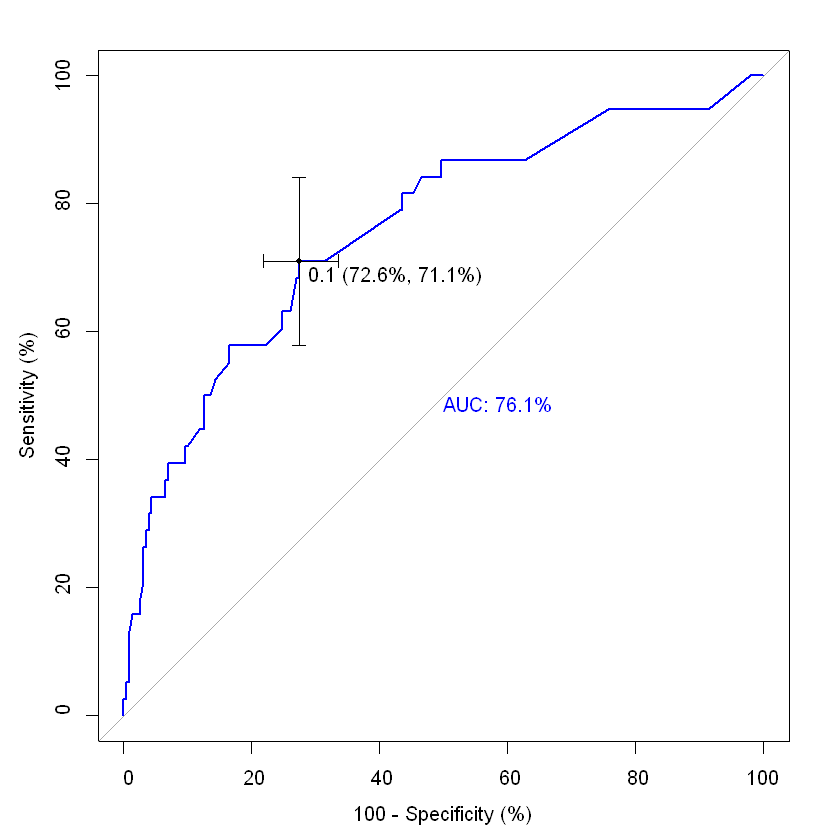

In [35]:
# ROC train
f2 <- glm(DM~ T_staging
          + N_staging
          + Clinical_staging
          + GPH
          + NC
          + RATH
          + CLN
          + PF
          + NPF
          + Enhancement
          + macrocalcification
          + LNM
          ,data = train,family = "binomial")

pre <- predict(f2, type='response')
plot.roc(train$DM, pre,
         #main="ROC Curve", 
         percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, 
         ci.type="bars", 
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue"
         ,identity=TRUE
         ,legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )

Setting levels: control = 0, case = 1

Setting direction: controls < cases



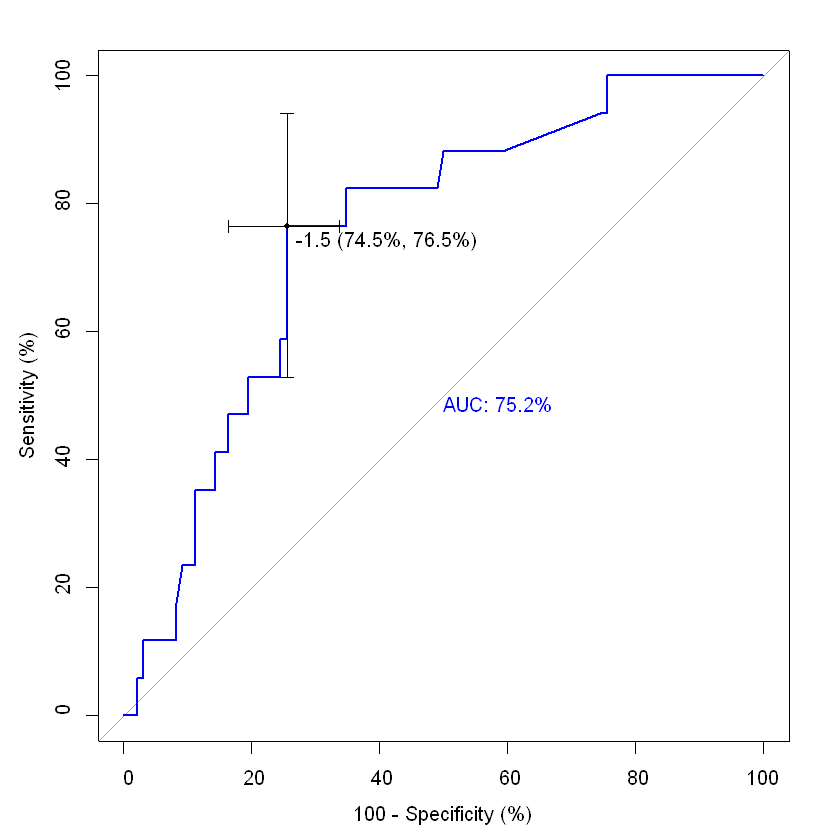

In [17]:
# ROC val
pre1 <- predict(f2,newdata = val)
plot.roc(val$DM, pre1,
         #main="ROC Curve", 
         percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, ci.type="bars",
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue",legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )

Setting levels: control = 0, case = 1

Setting direction: controls < cases



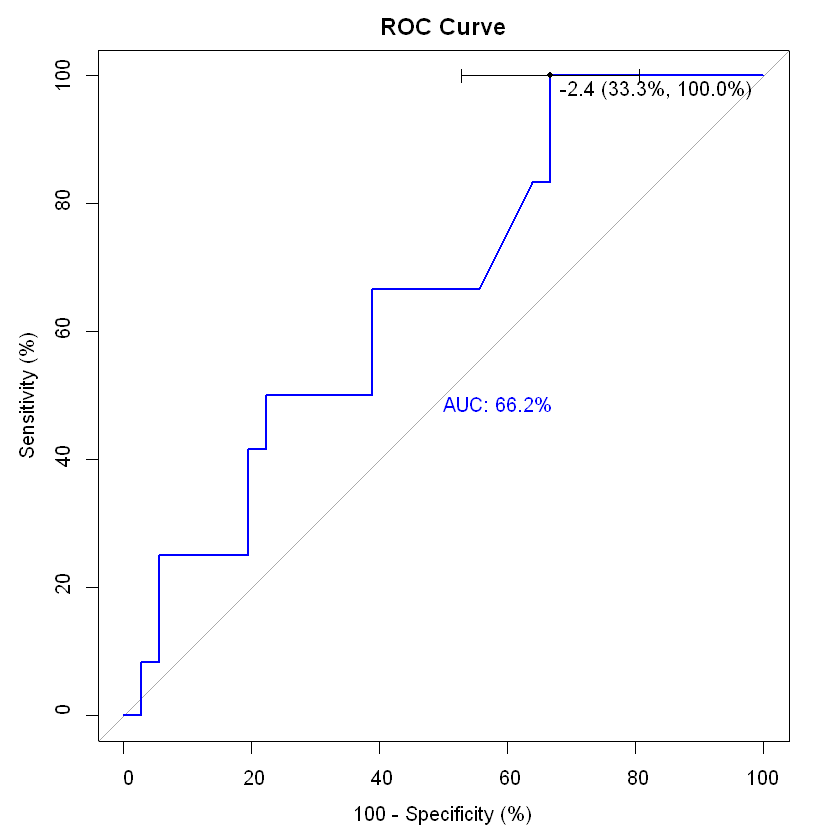

In [8]:
# ROC test
pre2 <- predict(f2,newdata = test)
plot.roc(test$DM, pre2,
         #main="ROC Curve", 
         percent=TRUE,
         print.auc=TRUE,
         ci=TRUE, ci.type="bars",
         of="thresholds",
         thresholds="best",
         print.thres="best",
         col="blue",legacy.axes=TRUE,
         print.auc.x=ifelse(50,50),
         print.auc.y=ifelse(50,50)
         )